In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

VERİYİ ÇEKME

In [2]:
df = pd.read_csv("veri-seti.csv")
df

,Pregnant Number,Plasma Glucose,Diolastic Blood Pressure(mm Hg),Triceps Skinfold Thickness(mm),2-Hours Serum Insulin(mu U/ml),Body Mass Index,Diabetes Pedigree Function,Age,Diabet
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


VERİYİ HAZIRLAMA

In [3]:
X = df.drop(columns=['Diabet'])
y = df['Diabet']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

In [4]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

PCA VE LDA

In [13]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca_train = pca.fit_transform(X_train)

X_pca_test = pca.fit_transform(X_test)
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit(X_scaled,y).transform(X_scaled)
print("PCA bileşenleri ve orijinal öznitelikler arasındaki ilişki:")
print(pd.DataFrame(pca.components_, columns=X.columns))

print("\nLDA bileşenleri ve orijinal öznitelikler arasındaki ilişki:")
print(pd.DataFrame(lda.scalings_, columns=['LD'], index=X.columns))

PCA bileşenleri ve orijinal öznitelikler arasındaki ilişki:
   Pregnant Number  Plasma Glucose  Diolastic Blood Pressure(mm Hg)  \
0         0.132659        0.340035                         0.277716   
1         0.593212        0.163650                         0.223387   

   Triceps Skinfold Thickness(mm)  2-Hours Serum Insulin(mu U/ml)  \
0                        0.446323                        0.578966   
1                       -0.251277                       -0.246129   

   Body Mass Index  Diabetes Pedigree Function       Age  
0         0.382161                    0.300318  0.137872  
1         0.023905                   -0.136868  0.654518  

LDA bileşenleri ve orijinal öznitelikler arasındaki ilişki:
                                       LD
Pregnant Number                  0.316076
Plasma Glucose                   0.862262
Diolastic Blood Pressure(mm Hg) -0.205606
Triceps Skinfold Thickness(mm)   0.011229
2-Hours Serum Insulin(mu U/ml)  -0.094776
Body Mass Index             

ÇOKLU DOĞRUSAL REGRESYON MODELİ PCA VERİSİ İLE 

In [22]:
linear_reg = LinearRegression()
linear_reg.fit(X_pca_train, y_train)
threshold = 0.5
linear_reg_predictions = linear_reg.predict(X_pca_test)
binary_predictions = [1 if prediction >= threshold else 0 for prediction in linear_reg_predictions]

Confusion Matrix:
[[129  19]
 [ 45  38]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       148
           1       0.67      0.46      0.54        83

    accuracy                           0.72       231
   macro avg       0.70      0.66      0.67       231
weighted avg       0.71      0.72      0.71       231



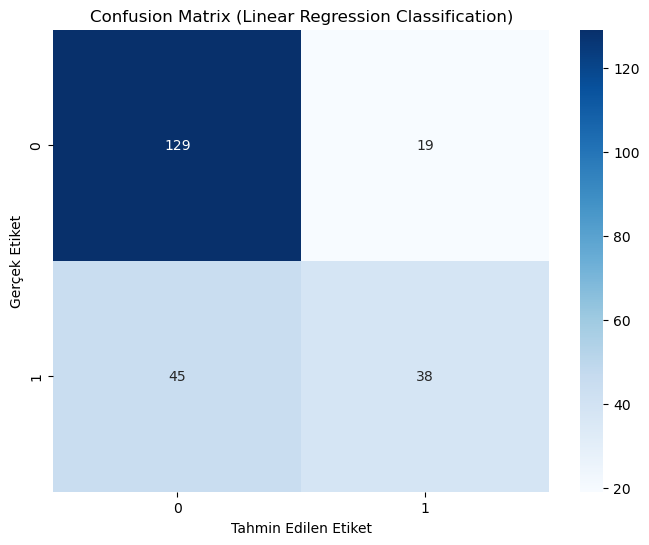

In [25]:
conf_matrix = confusion_matrix(y_test, binary_predictions)
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, binary_predictions))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Linear Regression Classification)")
plt.xlabel("Tahmin Edilen Etiket")
plt.ylabel("Gerçek Etiket")
plt.show()

MULTINOMINAL LOGISTIC REGRESSION MODELI PCA VERISI ILE

In [28]:
multinomial_log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
multinomial_log_reg.fit(X_pca_train, y_train)

LogisticRegression(multi_class='multinomial')

In [29]:
multinomial_log_reg_predictions = multinomial_log_reg.predict(X_pca_test)

conf_matrix_multinomial = confusion_matrix(y_test, multinomial_log_reg_predictions)
print("\nConfusion Matrix (Multinominal Lojistik Regresyon):")
print(conf_matrix_multinomial)

print("\nClassification Report (Multinominal Lojistik Regresyon):")
print(classification_report(y_test, multinomial_log_reg_predictions))


Confusion Matrix (Multinominal Lojistik Regresyon):
[[129  19]
 [ 45  38]]

Classification Report (Multinominal Lojistik Regresyon):
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       148
           1       0.67      0.46      0.54        83

    accuracy                           0.72       231
   macro avg       0.70      0.66      0.67       231
weighted avg       0.71      0.72      0.71       231



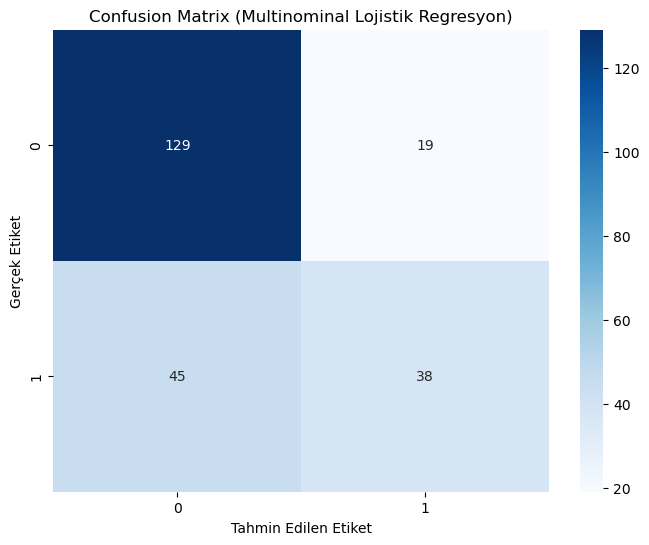

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix'i grafik olarak görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_multinomial, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Multinominal Lojistik Regresyon)")
plt.xlabel("Tahmin Edilen Etiket")
plt.ylabel("Gerçek Etiket")
plt.show()

DESICION TREE MODELİ OLUŞTURMA PCA VERİLERİ İLE

In [35]:
dtc = DecisionTreeClassifier(criterion="entropy")
dtc.fit(X_pca_train, y_train)

y_pred = dtc.predict(X_pca_test)

In [36]:
# Model performansını değerlendirme
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[113  35]
 [ 35  48]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       148
           1       0.58      0.58      0.58        83

    accuracy                           0.70       231
   macro avg       0.67      0.67      0.67       231
weighted avg       0.70      0.70      0.70       231



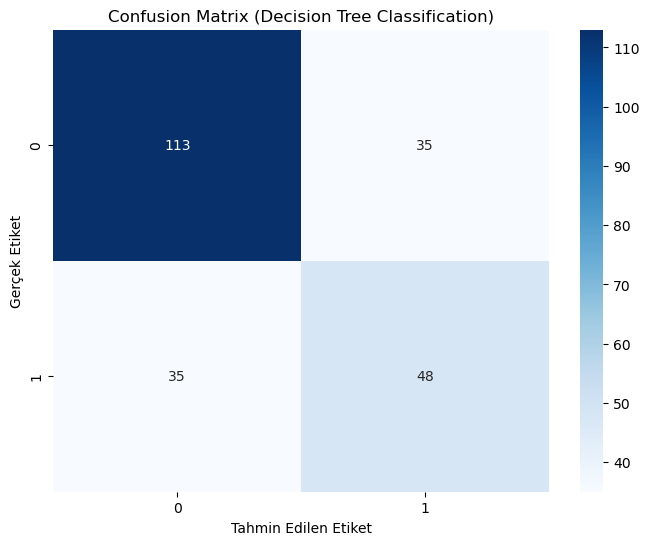

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Heatmap oluşturma
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Decision Tree Classification)")
plt.xlabel("Tahmin Edilen Etiket")
plt.ylabel("Gerçek Etiket")
plt.show()

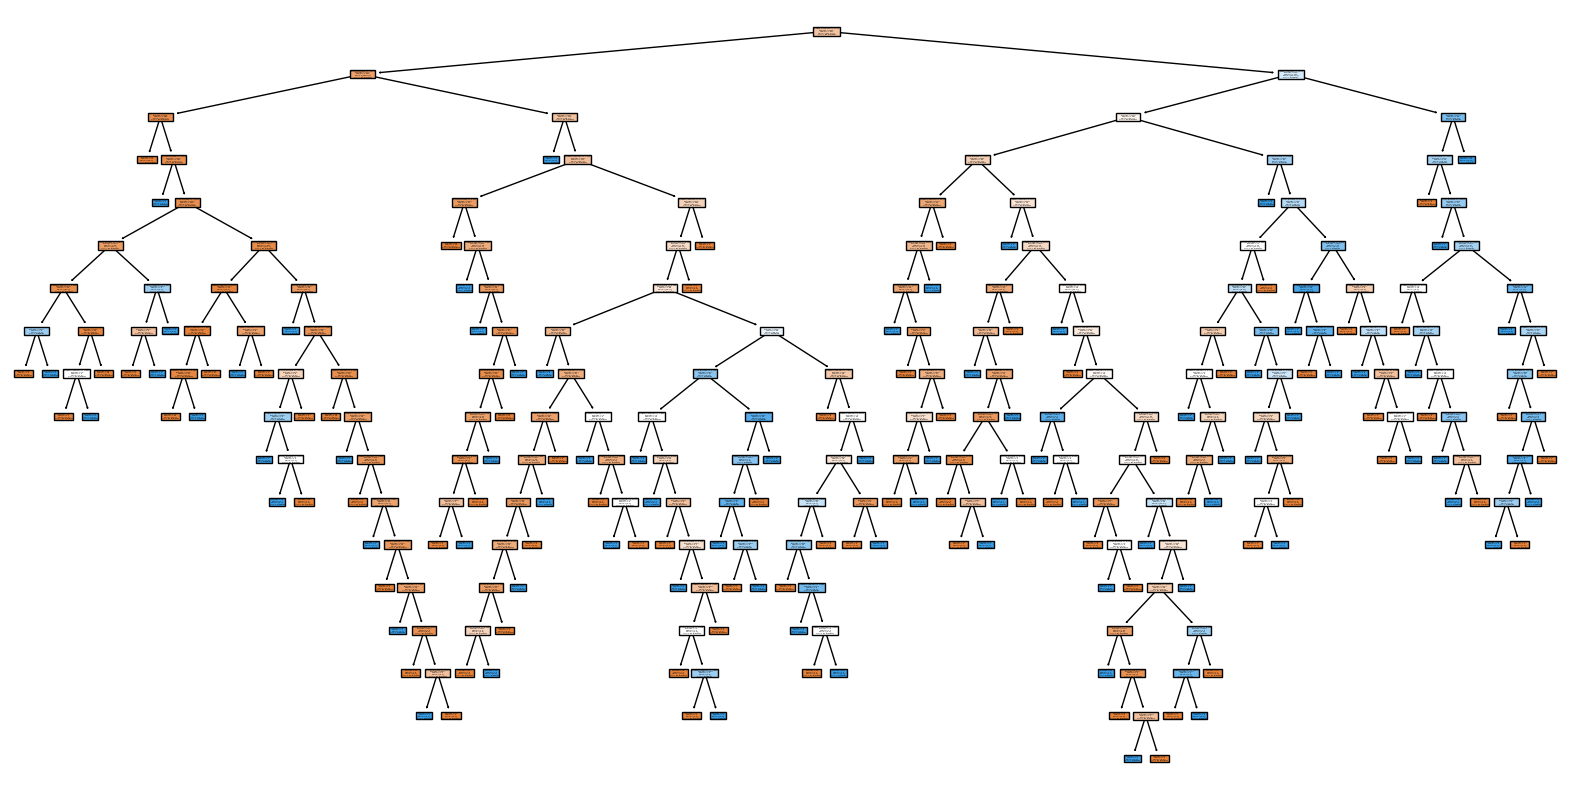

In [38]:
X_columns = ['Pregnant Number', 'Plasma Glucose', 'Diolastic Blood Pressure(mm Hg)',
       'Triceps Skinfold Thickness(mm)', '2-Hours Serum Insulin(mu U/ml)',
       'Body Mass Index', 'Diabetes Pedigree Function', 'Age']
plt.figure(figsize=(20, 10))
plot_tree(dtc, filled=True, feature_names=X_columns, class_names=["No Diabetes", "Diabetes"])
plt.show()

In [39]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.696969696969697


NAIVE BAYER MODELI OLUSTURMA PCA VERILERI ILE

In [45]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_pca_train, y_train)

GaussianNB()

Test Verisi Doğruluk Oranı: 0.7272727272727273

Test Verisi Confusion Matrix ve Sınıflandırma Raporu:
[[131  17]
 [ 46  37]]
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       148
           1       0.69      0.45      0.54        83

    accuracy                           0.73       231
   macro avg       0.71      0.67      0.67       231
weighted avg       0.72      0.73      0.71       231



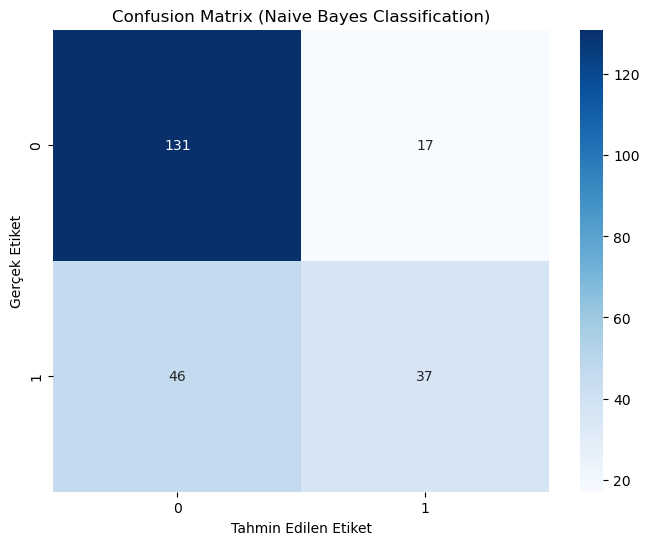

In [46]:
y_pred = naive_bayes.predict(X_pca_test)

test_accuracy = accuracy_score(y_test, y_pred)
print("Test Verisi Doğruluk Oranı:", test_accuracy)

print("\nTest Verisi Confusion Matrix ve Sınıflandırma Raporu:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Naive Bayes Classification)")
plt.xlabel("Tahmin Edilen Etiket")
plt.ylabel("Gerçek Etiket")
plt.show()